 INDIVIDUALS HEALTH CONSUMPTION PREDICTION USING MACHINE LEARNING

*Summary* : What we eat makes our well being be it physically or mentally. the type of food we consume and the food plan we follow.
consuming regular amount of outside/fast food  affects the nutrtitional intake of our body and degrades its functionality resulting in  negative outcomes. Excess consumption of junk food leads to constipation , depression , mood swings and food addiction to name afew.Machine Learning (ML)  is a branch of artificial intelligence (AI) which uses data and algorithms to imitate the models and eventually improves the accuracy. ML for prediction analyses vast amounts of data and identifies the patterns , relationships , behaviours of models more accurately as compared to humans making it more demanding in the healthcare industry. In this project, ML model is used for predicting how frequent comsumption of outside food has negative outcomes on individuals. Initially, a survey was conducted between April 2023 and May 2023 where in, real time data is collected from 150+ various individuals in the age group 18-22 on the factors representing how they consume food items on a daily basis.



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading the dataset
df = pd.read_csv("HEALTH_CUDDLE_2.csv")

In [ ]:
# displaying the parameters of the dataset of dataset
df.head()

,regular_food_type,Number_of_outside_food_per_month,meals_consumed_per_day,food_type,constipation,less_energy_or_sleepy,addiction,MoodSwings,reason,favourite_junkfood
0,HOME-MADE,10,1,BOTH,No,No,Yes,No,friends influence,Indian dishes
1,HOME-MADE,15,2,SOLID,No,Maybe,Maybe,No,living alone,Biryani
2,HOME-MADE,8,1,SOLID,Yes,Yes,Yes,Yes,friends influence,Sharwama
3,HOME-MADE,8,3,BOTH,Maybe,Yes,Maybe,No,friends influence,Misal Pav
4,HOME-MADE,2,1,SOLID,Maybe,Yes,Maybe,Maybe,friends influence,Burger


In [ ]:
#displaying the number of columns present in the dataset
df.columns

Index(['regular_food_type', 'Number_of_outside_food_per_month',
       ' meals_consumed_per_day', ' food_type', 'constipation',
       ' less_energy_or_sleepy', 'addiction', 'MoodSwings', ' reason',
       'favourite_junkfood'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   regular_food_type                 152 non-null    object
 1   Number_of_outside_food_per_month  153 non-null    int64 
 2    meals_consumed_per_day           153 non-null    int64 
 3    food_type                        153 non-null    object
 4   constipation                      144 non-null    object
 5    less_energy_or_sleepy            153 non-null    object
 6   addiction                         153 non-null    object
 7   MoodSwings                        153 non-null    object
 8    reason                           153 non-null    object
 9   favourite_junkfood                153 non-null    object
dtypes: int64(2), object(8)
memory usage: 12.1+ KB


In [ ]:
# searching for any missing values in the dataset
df.isna()

,regular_food_type,Number_of_outside_food_per_month,meals_consumed_per_day,food_type,constipation,less_energy_or_sleepy,addiction,MoodSwings,reason,favourite_junkfood
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
148,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False


In [ ]:
# for cleaning process removing the rows with missing values
df.dropna().copy()

,regular_food_type,Number_of_outside_food_per_month,meals_consumed_per_day,food_type,constipation,less_energy_or_sleepy,addiction,MoodSwings,reason,favourite_junkfood
0,HOME-MADE,10,1,BOTH,No,No,Yes,No,friends influence,Indian dishes
1,HOME-MADE,15,2,SOLID,No,Maybe,Maybe,No,living alone,Biryani
2,HOME-MADE,8,1,SOLID,Yes,Yes,Yes,Yes,friends influence,Sharwama
3,HOME-MADE,8,3,BOTH,Maybe,Yes,Maybe,No,friends influence,Misal Pav
4,HOME-MADE,2,1,SOLID,Maybe,Yes,Maybe,Maybe,friends influence,Burger
...,...,...,...,...,...,...,...,...,...,...
148,both,5,2,BOTH,No,Yes,Yes,Yes,friends influence,Momos
149,both,3,2,SOLID,No,Yes,Yes,No,friends influence,Noodles
150,HOME-MADE,3,2,SOLID,No,Yes,Yes,No,junk food availability at home,Waffles
151,both,3,2,SOLID,Yes,No,Yes,No,living alone,Frooti


In [ ]:
# having a look at the entire dataset after cleaning process
df

,regular_food_type,Number_of_outside_food_per_month,meals_consumed_per_day,food_type,constipation,less_energy_or_sleepy,addiction,MoodSwings,reason,favourite_junkfood
0,HOME-MADE,10,1,BOTH,No,No,Yes,No,friends influence,Indian dishes
1,HOME-MADE,15,2,SOLID,No,Maybe,Maybe,No,living alone,Biryani
2,HOME-MADE,8,1,SOLID,Yes,Yes,Yes,Yes,friends influence,Sharwama
3,HOME-MADE,8,3,BOTH,Maybe,Yes,Maybe,No,friends influence,Misal Pav
4,HOME-MADE,2,1,SOLID,Maybe,Yes,Maybe,Maybe,friends influence,Burger
...,...,...,...,...,...,...,...,...,...,...
148,both,5,2,BOTH,No,Yes,Yes,Yes,friends influence,Momos
149,both,3,2,SOLID,No,Yes,Yes,No,friends influence,Noodles
150,HOME-MADE,3,2,SOLID,No,Yes,Yes,No,junk food availability at home,Waffles
151,both,3,2,SOLID,Yes,No,Yes,No,living alone,Frooti


In [ ]:
# creating dummy variables for categorical data for fitting
# this allows for easy interpretation of calculation of the odd ratios, and also  increases the stability  of the coefficients.
# CLASSIFYING HOW MANY OF THE ABOVE CATEGORIES HAVE MORE THAN 1 VARIATIONS

In [ ]:
df['Number_of_outside_food_per_month'].value_counts(dropna=False)

3     33
2     31
4     23
5     14
1     13
8     10
6     10
0     10
7      4
10     2
15     2
9      1
Name: Number_of_outside_food_per_month, dtype: int64

In [ ]:
df['regular_food_type'].value_counts(dropna=False)

HOME-MADE    74
OUTSIDE      43
both         35
NaN           1
Name: regular_food_type, dtype: int64

In [ ]:
df[' meals_consumed_per_day'].value_counts(dropna=False)

1    57
2    55
3    28
0    13
Name:  meals_consumed_per_day, dtype: int64

In [ ]:
df[' food_type'].value_counts(dropna=False)

SOLID     74
BOTH      40
LIQUID    29
NAN       10
Name:  food_type, dtype: int64

In [ ]:
df['constipation'].value_counts(dropna=False)

No       82
Yes      47
Maybe    15
NaN       9
Name: constipation, dtype: int64

In [ ]:
df[' less_energy_or_sleepy'].value_counts(dropna=False)

No       74
Yes      56
Maybe    13
NAN      10
Name:  less_energy_or_sleepy, dtype: int64

In [ ]:
df['addiction'].value_counts(dropna=False)

Yes      93
No       35
Maybe    15
NAN      10
Name: addiction, dtype: int64

In [ ]:
df['MoodSwings'].value_counts(dropna=False)

No       98
Yes      36
NAN      10
Maybe     9
Name: MoodSwings, dtype: int64

In [ ]:
df[' reason'].value_counts(dropna=False)

friends influence                  49
living alone                       33
junk food availability at home     31
junk food availability at home     16
i dont eat outside food            12
 friends influence                  8
friends influence                   4
Name:  reason, dtype: int64

In [ ]:
df['favourite_junkfood'].value_counts(dropna = False)

Pizza           11
NAN              9
Chips            9
Fries            6
Noodles          5
                ..
Cappuccino       1
milkshake        1
Biryani          1
smoothie         1
Cheese pizza     1
Name: favourite_junkfood, Length: 82, dtype: int64

In [ ]:
columns = ['regular_food_type',' meals_consumed_per_day',' food_type','constipation',' less_energy_or_sleepy','addiction','MoodSwings',' reason']
df = pd.get_dummies(df, columns=columns, drop_first=True)



In [ ]:
df

,Number_of_outside_food_per_month,favourite_junkfood,regular_food_type_OUTSIDE,regular_food_type_both,meals_consumed_per_day_1,meals_consumed_per_day_2,meals_consumed_per_day_3,food_type_LIQUID,food_type_NAN,food_type_SOLID,...,addiction_Yes,MoodSwings_NAN,MoodSwings_No,MoodSwings_Yes,reason_friends influence,reason_friends influence,reason_i dont eat outside food,reason_junk food availability at home,reason_junk food availability at home,reason_living alone
0,10,Indian dishes,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,15,Biryani,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,8,Sharwama,0,0,1,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
3,8,Misal Pav,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2,Burger,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,5,Momos,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
149,3,Noodles,0,1,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
150,3,Waffles,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
151,3,Frooti,0,1,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [ ]:
categorical_columns = ['regular_food_type',' food_type','constipation',' less_energy_or_sleepy','addiction','MoodSwings']
numeric_columns = [' quantity_consumed_per_day','']

categorical_columns = list(set(df.columns) - set(numeric_columns) )
categorical_columns.sort()

print(numeric_columns)
print(categorical_columns)

[' quantity_consumed_per_day', '']
[' food_type_LIQUID', ' food_type_NAN', ' food_type_SOLID', ' less_energy_or_sleepy_NAN', ' less_energy_or_sleepy_No', ' less_energy_or_sleepy_Yes', ' meals_consumed_per_day_1', ' meals_consumed_per_day_2', ' meals_consumed_per_day_3', ' reason_friends influence', ' reason_friends influence ', ' reason_i dont eat outside food', ' reason_junk food availability at home', ' reason_junk food availability at home ', ' reason_living alone', 'MoodSwings_NAN', 'MoodSwings_No', 'MoodSwings_Yes', 'Number_of_outside_food_per_month', 'addiction_NAN', 'addiction_No', 'addiction_Yes', 'constipation_No', 'constipation_Yes', 'favourite_junkfood', 'regular_food_type_OUTSIDE', 'regular_food_type_both']


<Axes: xlabel='regular_food_type_OUTSIDE', ylabel='count'>

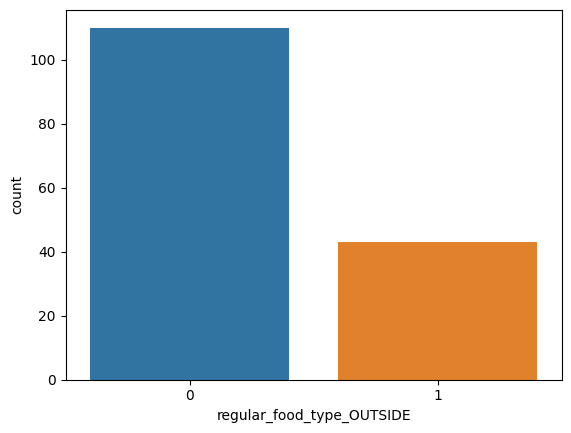

In [ ]:
# observing distrubution
import seaborn as sns
sns.countplot(x='regular_food_type_OUTSIDE',data = df)

<Axes: xlabel='regular_food_type_both', ylabel='count'>

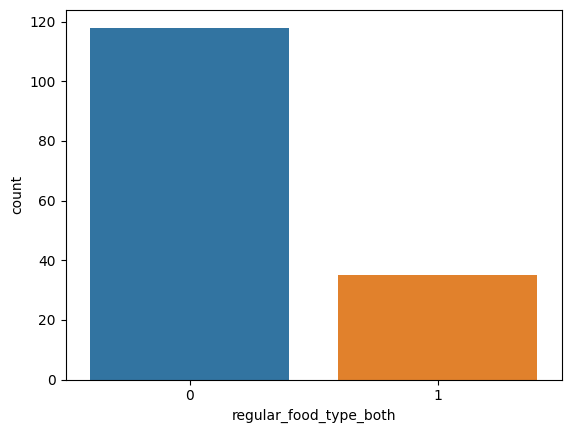

In [ ]:
sns.countplot(x='regular_food_type_both',data = df)

<Axes: xlabel='constipation_No', ylabel='count'>

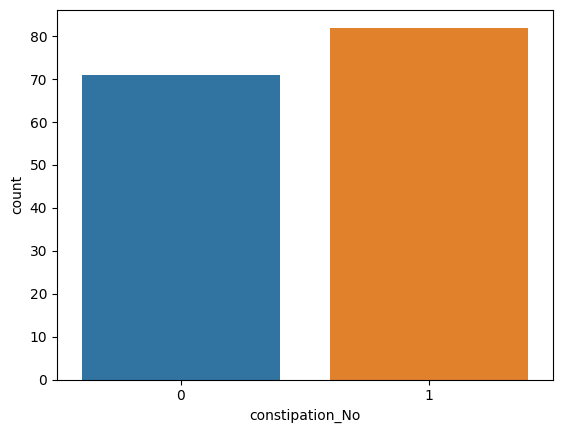

In [ ]:
sns.countplot(x='constipation_No', data = df)

<Axes: xlabel='constipation_Yes', ylabel='count'>

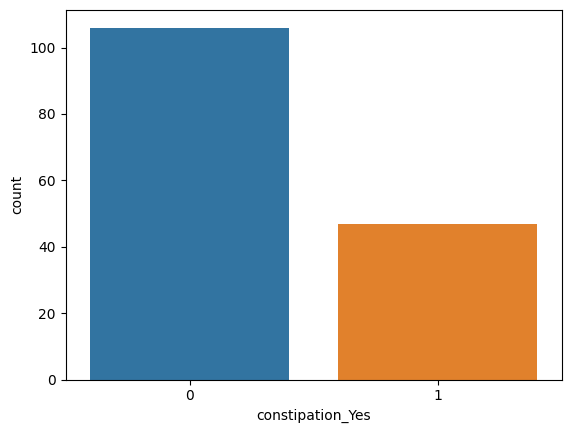

In [ ]:
sns.countplot(x='constipation_Yes', data = df)

<Axes: xlabel='addiction_No', ylabel='count'>

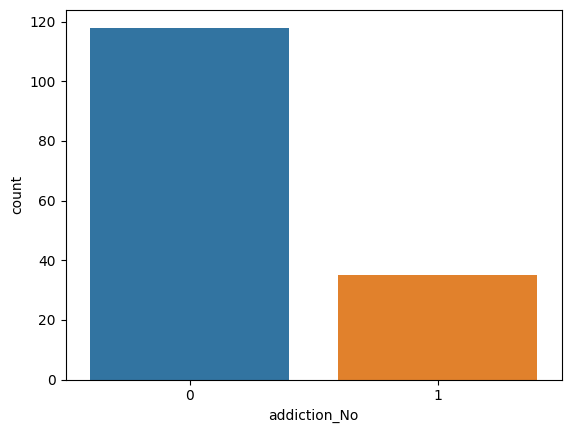

In [ ]:
sns.countplot(x='addiction_No', data = df)

<Axes: xlabel='addiction_Yes', ylabel='count'>

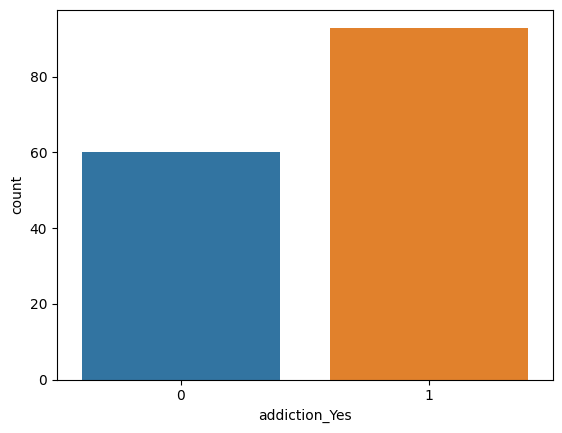

In [ ]:
sns.countplot(x='addiction_Yes', data = df)

<Axes: xlabel='MoodSwings_No', ylabel='count'>

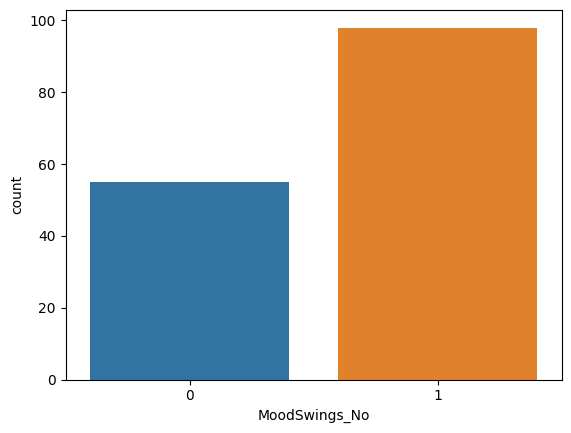

In [ ]:
sns.countplot(x='MoodSwings_No', data = df)

<Axes: xlabel='MoodSwings_Yes', ylabel='count'>

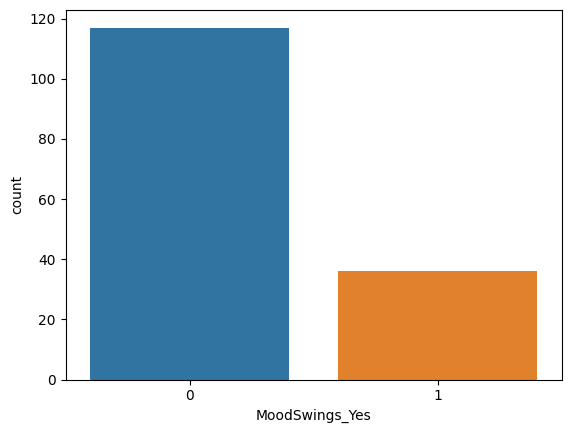

In [ ]:
sns.countplot(x='MoodSwings_Yes', data = df)

<Axes: xlabel='regular_food_type_OUTSIDE', ylabel='constipation_Yes'>

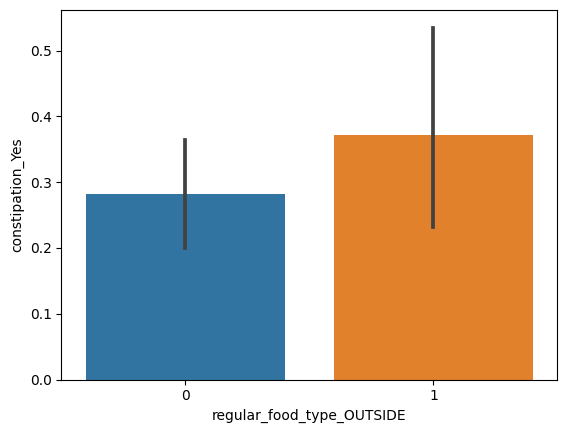

In [ ]:
sns.barplot(y='constipation_Yes',x='regular_food_type_OUTSIDE', data=df)

<Axes: xlabel='regular_food_type_OUTSIDE', ylabel='addiction_Yes'>

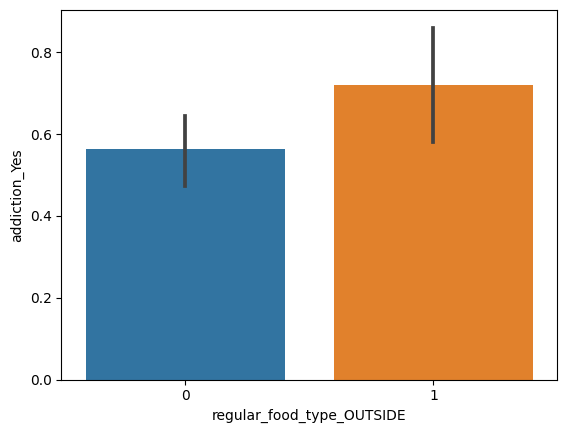

In [ ]:
sns.barplot(y='addiction_Yes',x='regular_food_type_OUTSIDE', data=df)

<Axes: xlabel='regular_food_type_OUTSIDE', ylabel='MoodSwings_Yes'>

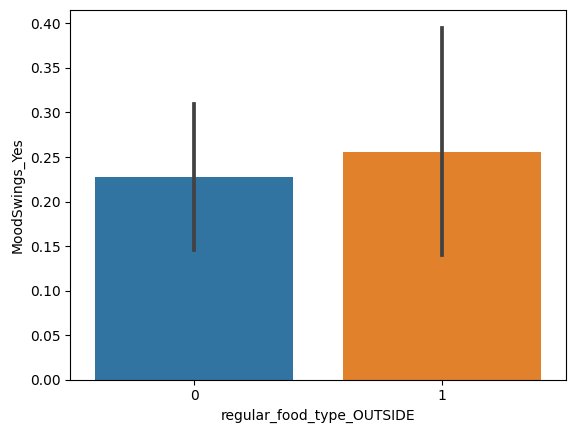

In [ ]:
sns.barplot(y='MoodSwings_Yes',x='regular_food_type_OUTSIDE', data=df)

<Axes: xlabel=' food_type_LIQUID', ylabel='count'>

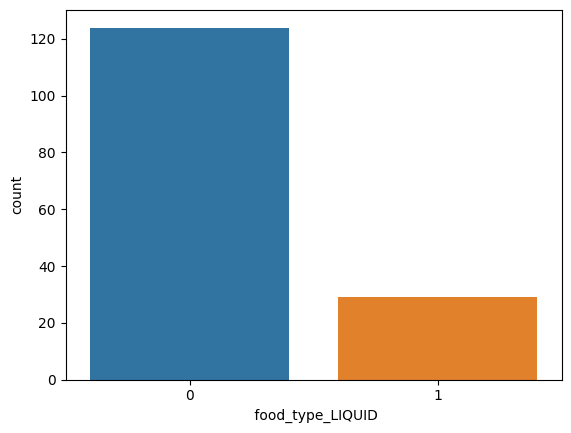

In [ ]:
sns.countplot(x = ' food_type_LIQUID',data = df)

<Axes: xlabel=' food_type_SOLID', ylabel='count'>

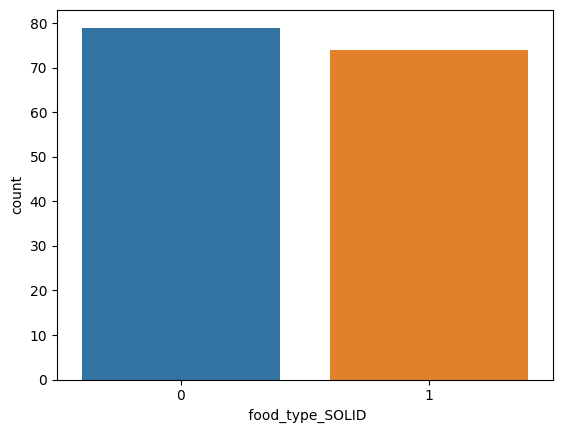

In [ ]:
sns.countplot(x = ' food_type_SOLID',data = df)

<ipython-input-106-645fbfde3381>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['regular_food_type_OUTSIDE']);


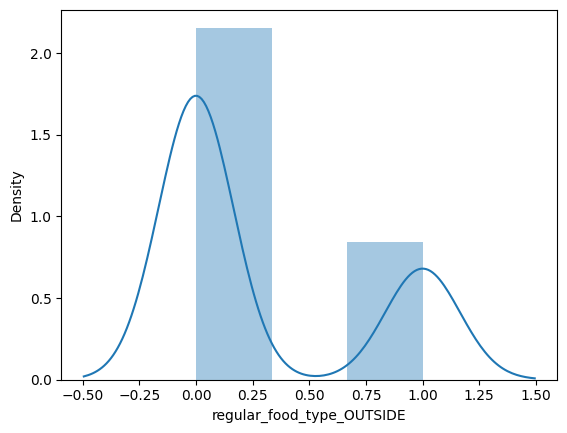

In [ ]:
sns.distplot(df['regular_food_type_OUTSIDE']);

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>,

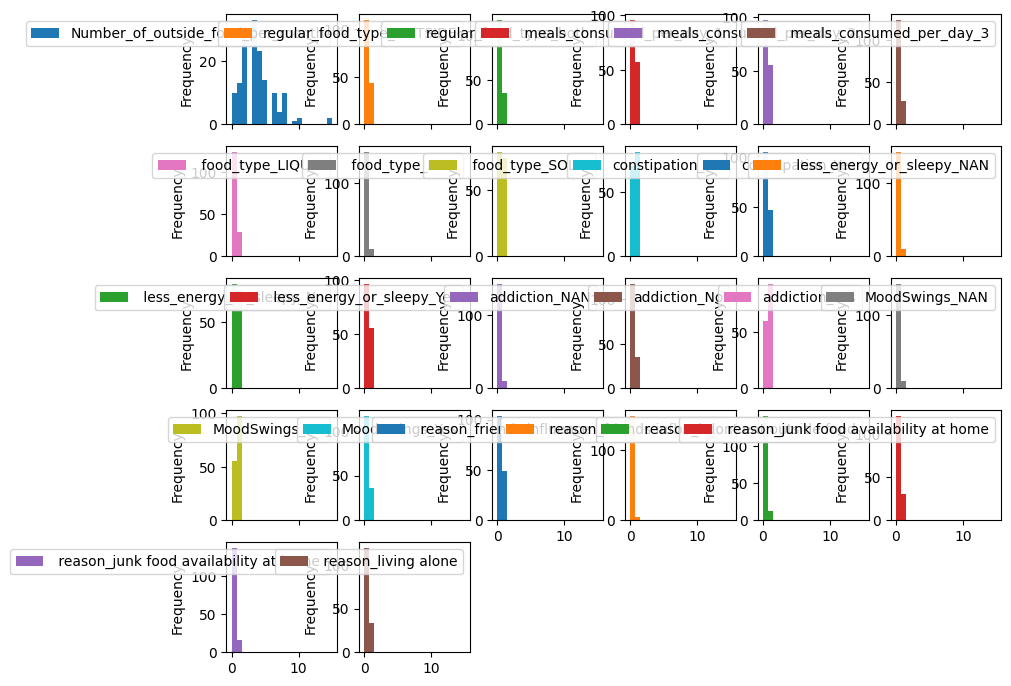

In [ ]:
df.plot.hist(subplots=True, layout=(6,6), figsize=(10, 10), bins=20)

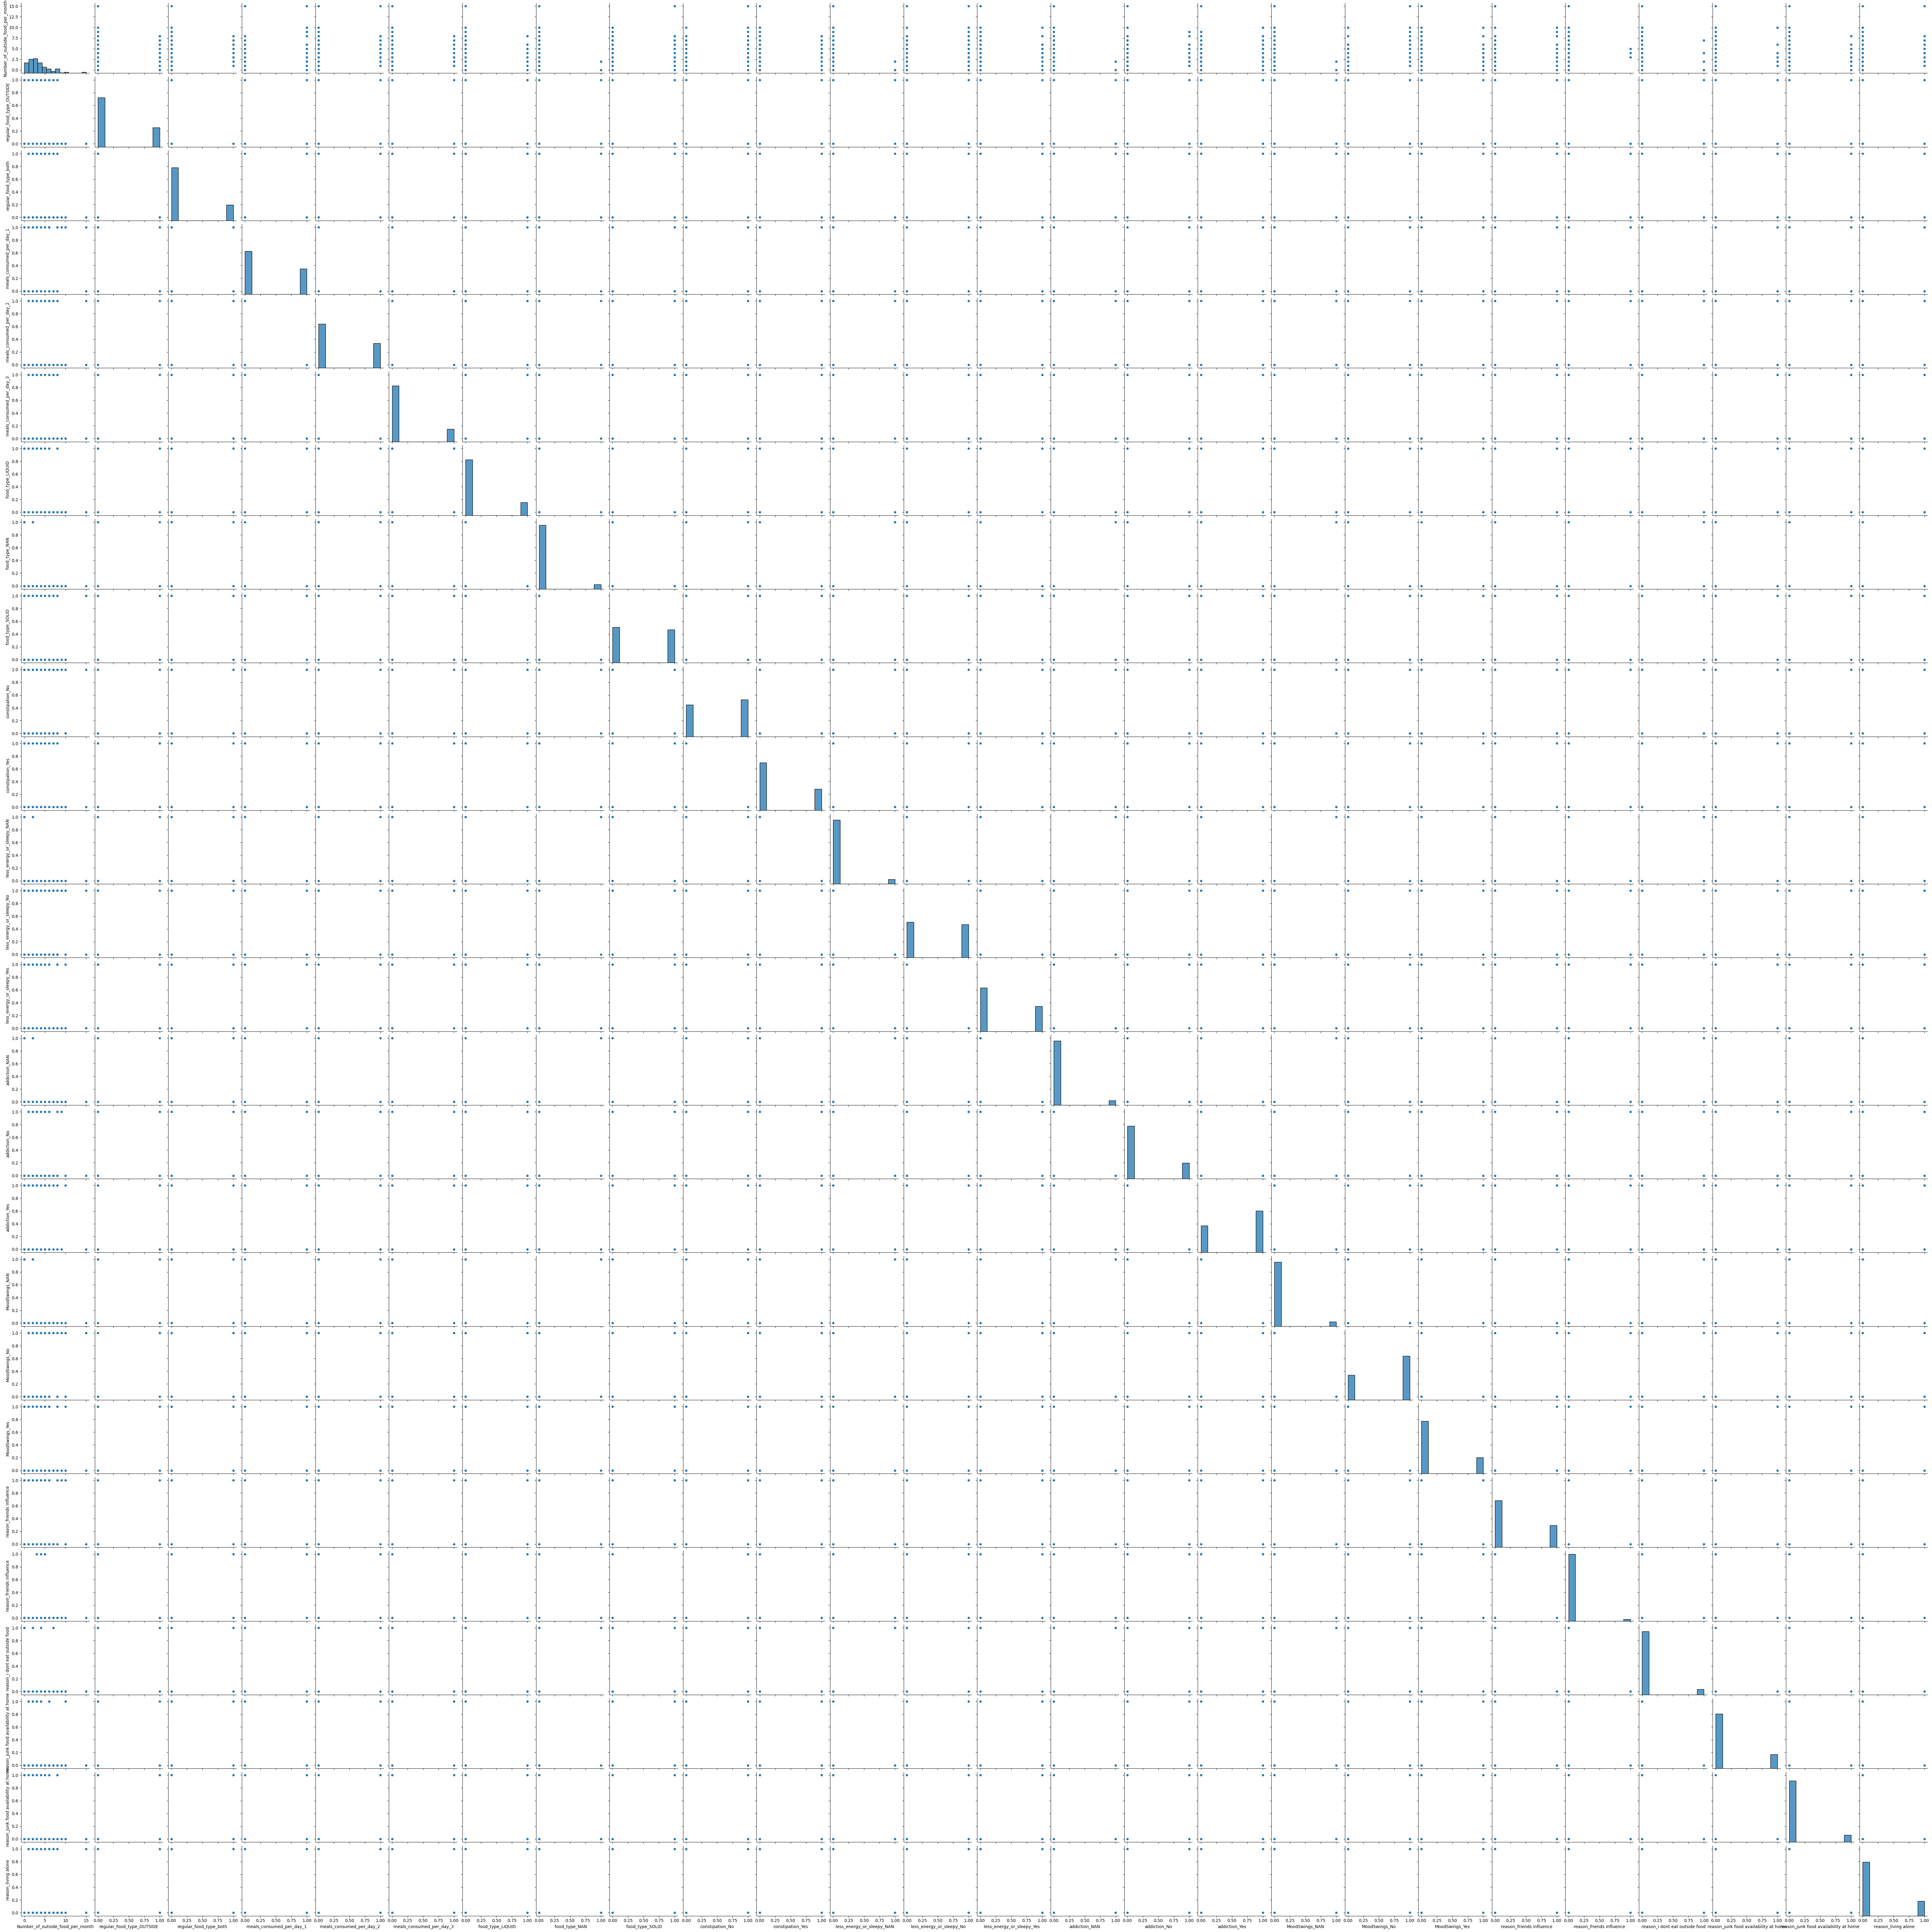

In [ ]:
sns.pairplot(df)

<ipython-input-107-4617079ea9b1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = df.corr()


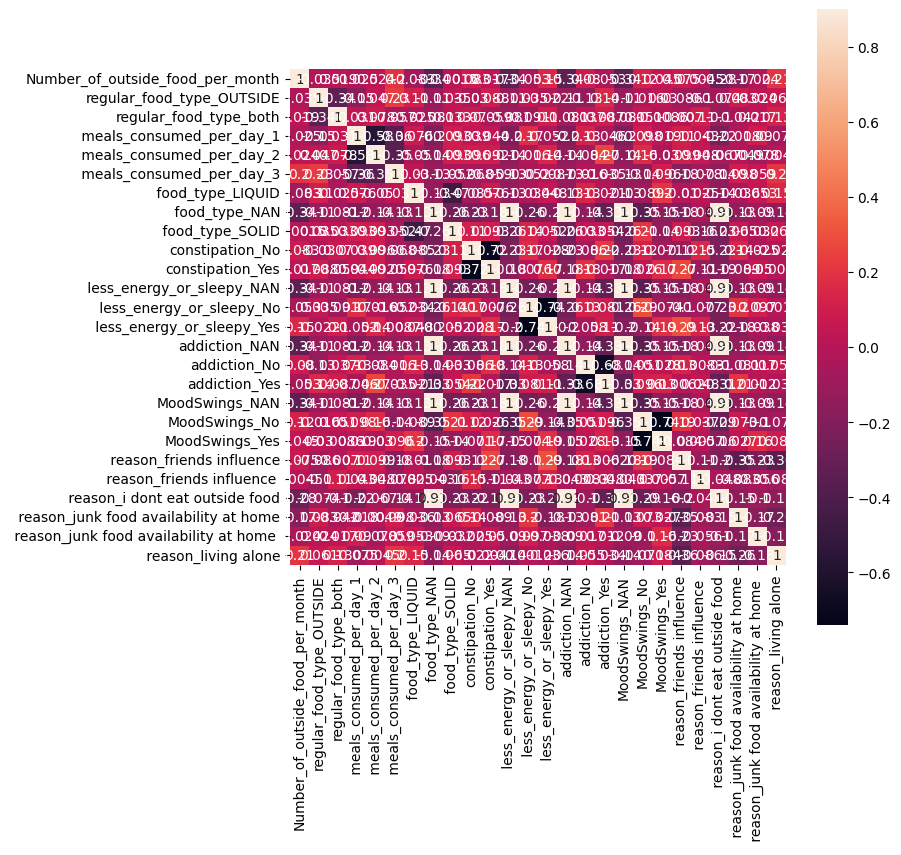

In [ ]:
from sklearn.metrics import confusion_matrix
df_corr = df.drop(columns=['favourite_junkfood'])
correlation_metrics = df.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(correlation_metrics , vmax = 0.9 , square = True, annot = True)
plt.show()

In [ ]:
 #importing the libraries for training the model
from sklearn.model_selection import train_test_split

#from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)  # replacing empty cells with NAN

In [ ]:
x = df.drop(['regular_food_type_OUTSIDE','favourite_junkfood'] , axis = 1)
y = df['regular_food_type_OUTSIDE']
# splitting for 60 % test and 40% training
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.40 , random_state =42)
xtest.shape
logisticreg = LogisticRegression()
logisticreg.fit(xtrain , ytrain)


LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

In [ ]:
y_pred = logisticreg.predict(xtest)
logisticsreg = LogisticRegression()
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
accuracy = logisticreg.score(xtest , ytest)
cm = metrics.confusion_matrix(ytest , y_pred)
print(cm)

[[37  6]
 [14  5]]


In [ ]:
print('accuracy score of the logistic regression model for is :', accuracy*100,'%')

accuracy score of the logistic regression model for is : 67.74193548387096 %


In [ ]:
logreg=accuracy_score(ytest,y_pred)
logreg

0.6774193548387096

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
roc_auc_score(ytest, y_pred)

0.5618115055079559

Text(0, 0.5, 'True Positive Rate')

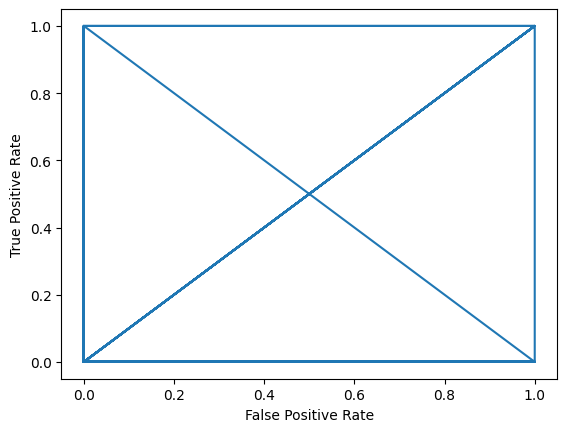

In [ ]:
plt.plot(ytest, y_pred)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        43
           1       0.45      0.26      0.33        19

    accuracy                           0.68        62
   macro avg       0.59      0.56      0.56        62
weighted avg       0.64      0.68      0.65        62

